In [68]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
from skimage import io

import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt

In [69]:
# importation d'une image test, il faudra faire une boucle pour importer toutes les images et appliquer l'algo
image_test = io.imread('Data/test.tif')
print(f"l'image est de la forme {image_test.shape}")

l'image est de la forme (904, 1224)


In [71]:
# cette fonction récupère de manière aléatoire un nbr "max_patches" de patches de taille (256,256) depuis notre image
patches = image.extract_patches_2d(image_test, (256, 256),max_patches=50)
print(f"la list de patch est de la forme {patches.shape}")

la list de patch est de la forme (50, 256, 256)


[[  45 1132  666 ... 3369 5100 7102]
 [ 573  220  602 ... 3401 3660 4798]
 [ 509  540  762 ... 3081 2988 3006]
 ...
 [ 260  528  236 ...    0   21  125]
 [ 500  432  124 ...  349  373    0]
 [ 372    0  252 ...  285    0    0]]
[4268   31    0 ...    0    0    1]


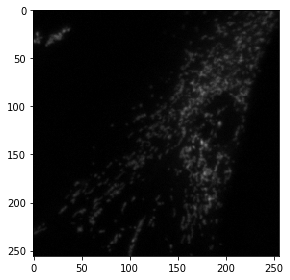

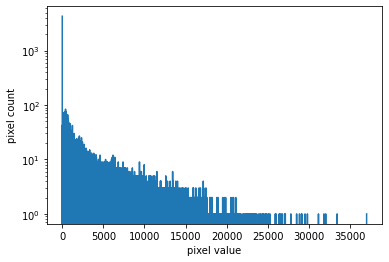

In [101]:
# pour l'exemple je prends un patch au hasard:
patch = patches[43]

#on l'affiche
io.imshow(patch)

# ainsi que son tableau, chaque valeur = 1 pixel
print(patch)

# les images de bases sont en unsigned 16 bits donc les pixels vont de 0 --> 65536
# on peut afficher un histogramme:
histogramme, classes = np.histogram(patch, bins=65536)

# ça compte le nombre de pixel ayant la même valeur pour chaque classe
print(histogramme)


# on peut tracer l'histo:
plt.figure()
plt.xlabel("pixel value")
plt.ylabel("pixel count")
plt.yscale('log')
plt.plot(classes[0:-1], histogramme)
plt.show()

In [102]:
# la plus grosse diff entre un noyau et le reste c'est probablement le fait d'avoir des valeurs blanches >30000
# en faisant un truc du genre:
print(np.count_nonzero(patch > 30000))
# on peut avoir le nombre de pixel avec une valeur > 30 000 dans notre image

# On pourrait se dire que si y en a beaucoup (donc definir un seuil) on garde pas l'image

5
